In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

In [3]:
d0 = pd.read_csv('sdBShortP_large_Jdot_1_alpha_0.5_ce_applied.csv')
d1 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_0.5_ce_applied.csv')
d2 = pd.read_csv('sdBShortP_large_Jdot_30_alpha_0.5_ce_applied.csv')
d3 = pd.read_csv('sdBShortP_large_Jdot_100_alpha_0.5_ce_applied.csv')

d4 = pd.read_csv('sdBShortP_large_Jdot_0.3_alpha_0.5_ce_applied.csv')
d5 = pd.read_csv('sdBShortP_large_Jdot_10_alpha_0.5_ce_applied.csv')

label1 = 'Jdot = 1'
label2 = 'Jdot = 3'
label3 = 'Jdot = 30'
label4 = 'Jdot = 100'

label5 = 'Jdot = 0.3'
label6 = 'Jdot = 10'

In [4]:
d0.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13175 entries, 0 to 13174
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   path                         13175 non-null  object 
 1   stability                    13175 non-null  object 
 2   n_ML_phases                  13175 non-null  int64  
 3   FeH_init                     13175 non-null  float64
 4   Z_init                       13175 non-null  float64
 5   termination_code             13175 non-null  object 
 6   PRLODays                     13175 non-null  float64
 7   PoverPMax                    13175 non-null  int64  
 8   TtipMyr                      13175 non-null  float64
 9   GalAgeMyr                    13175 non-null  float64
 10  AgeBinNum                    13175 non-null  int64  
 11  DeltaTBin                    13175 non-null  int64  
 12  P_init                       13175 non-null  float64
 13  P_final         

In [5]:
sel_types = ['sdB']
dsdb0 = d0[d0['product'].isin(sel_types)]
dsdb1 = d1[d1['product'].isin(sel_types)]
dsdb2 = d2[d2['product'].isin(sel_types)]
dsdb3 = d3[d3['product'].isin(sel_types)]

dsdb4 = d4[d4['product'].isin(sel_types)]
dsdb5 = d5[d5['product'].isin(sel_types)]

dsdb1a = d4[d4['product'].isin(sel_types)]
dsdb1b = d5[d5['product'].isin(sel_types)]

In [6]:
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 2.5]
labels = ['0.1', '0.3', '0.5', '0.7', '0.9', '+1.0']

dsdb0['M2_final_bin'] = pd.cut(dsdb0['M2_final'], bins=bins, labels=labels)
dsdb1['M2_final_bin'] = pd.cut(dsdb1['M2_final'], bins=bins, labels=labels)
dsdb2['M2_final_bin'] = pd.cut(dsdb2['M2_final'], bins=bins, labels=labels)
dsdb3['M2_final_bin'] = pd.cut(dsdb3['M2_final'], bins=bins, labels=labels)

dsdb4['M2_final_bin'] = pd.cut(dsdb4['M2_final'], bins=bins, labels=labels)
dsdb5['M2_final_bin'] = pd.cut(dsdb5['M2_final'], bins=bins, labels=labels)

dsdb1a['M2_final_bin'] = pd.cut(dsdb1a['M2_final'], bins=bins, labels=labels)
dsdb1b['M2_final_bin'] = pd.cut(dsdb1b['M2_final'], bins=bins, labels=labels)

In [7]:
print(label1)
print(d0[(d0['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label2)
print(d1[(d1['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label3)
print(d2[(d2['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label4)
print(d3[(d3['stability'] == 'CE')]['product'].value_counts(sort=False))

Jdot = 1
He-WD    1764
sdB       264
Name: product, dtype: int64
Jdot = 3
He-WD    1728
sdB       267
Name: product, dtype: int64
Jdot = 30
He-WD    1674
HB          2
sdB       270
Name: product, dtype: int64
Jdot = 100
He-WD    1751
HB          2
sdB       294
Name: product, dtype: int64


# Stability comparison

In [8]:
data_all = pd.concat([d0, d1, d2, d3, d4, d5])

Text(0.5, 0, 'Jdot/p stability limit')

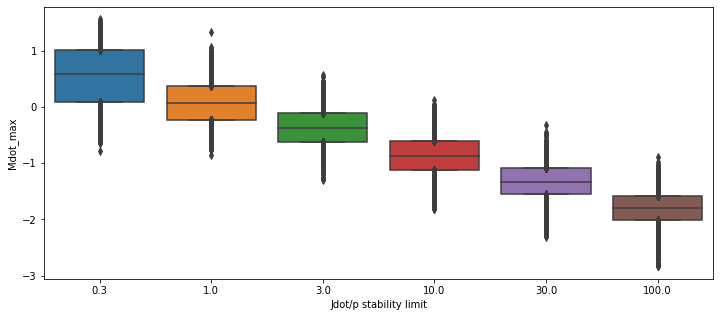

In [9]:
pl.figure(figsize=(12, 5))
sns.boxplot('stability_limit', 'Mdot_max', data=data_all[data_all['stability'] == 'CE'], whis=0)
pl.xlabel('Jdot/p stability limit')

Text(0.5, 0, 'Jdot/p stability limit')

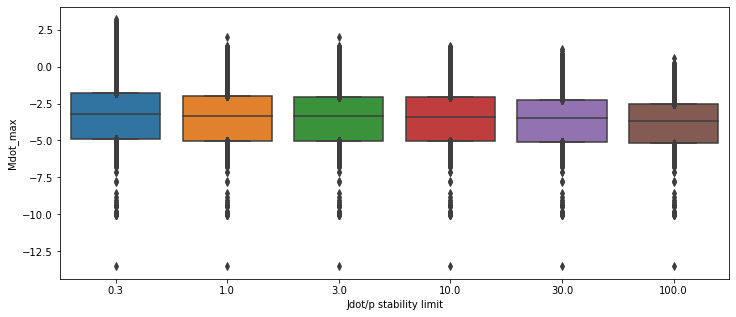

In [10]:
pl.figure(figsize=(12, 5))
sns.boxplot('stability_limit', 'Mdot_max', data=data_all[data_all['stability'] == 'stable'], whis=0)
pl.xlabel('Jdot/p stability limit')

In [11]:
data_all = pd.concat([dsdb0, dsdb1, dsdb2, dsdb3, dsdb4, dsdb5])

Text(0.5, 0, 'Jdot/p stability limit')

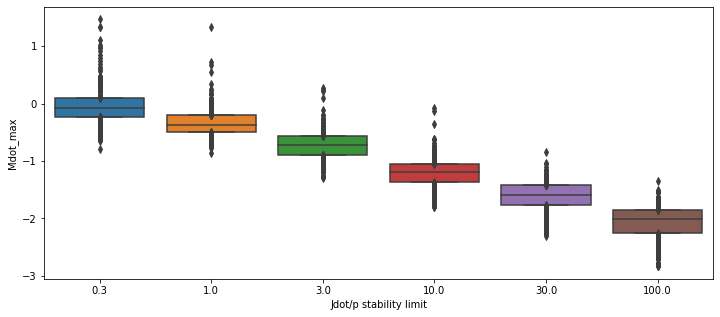

In [12]:
pl.figure(figsize=(12, 5))
sns.boxplot('stability_limit', 'Mdot_max', data=data_all[data_all['stability'] == 'CE'], whis=0)
pl.xlabel('Jdot/p stability limit')

Text(0.5, 0, 'Jdot/p stability limit')

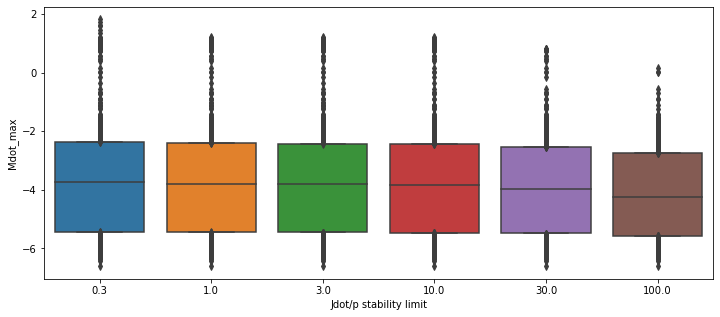

In [13]:
pl.figure(figsize=(12, 5))
sns.boxplot('stability_limit', 'Mdot_max', data=data_all[data_all['stability'] == 'stable'], whis=0)
pl.xlabel('Jdot/p stability limit')

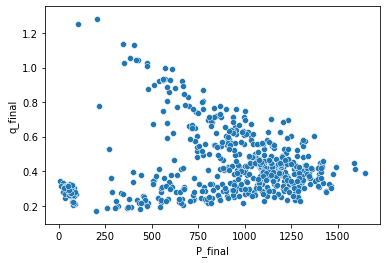

In [14]:
sns.scatterplot('P_final', 'q_final', data=dsdb1[dsdb1['stability'] == 'stable'])

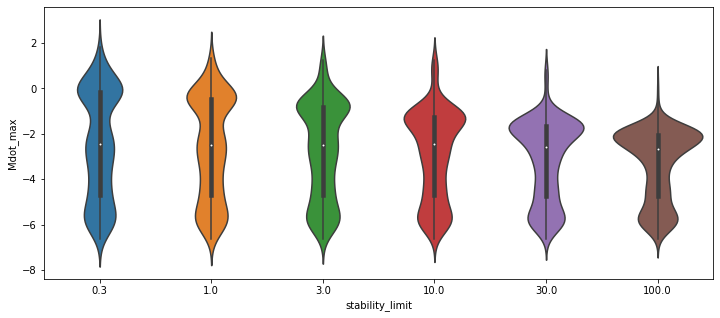

In [15]:
pl.figure(figsize=(12, 5))
sns.violinplot('stability_limit', 'Mdot_max', data=data_all)

# Accuracy of the predictions

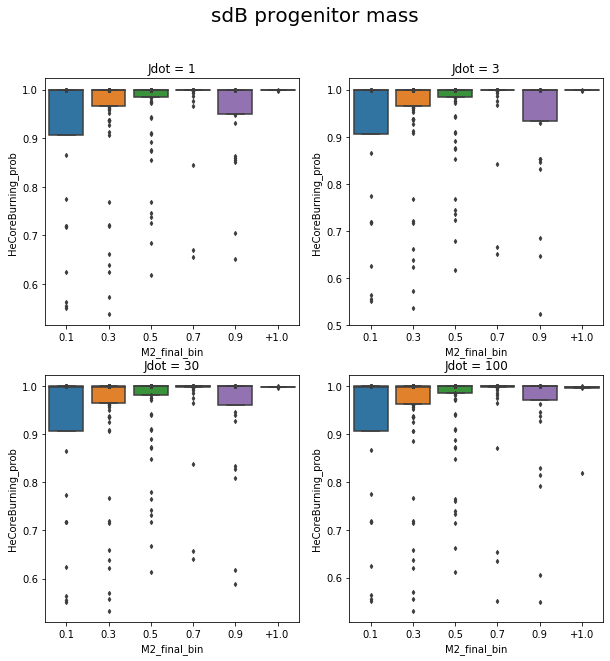

In [16]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'HeCoreBurning_prob', data=df[df['stability'] == 'CE'], fliersize=3, whis=0)

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("sdB progenitor mass", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

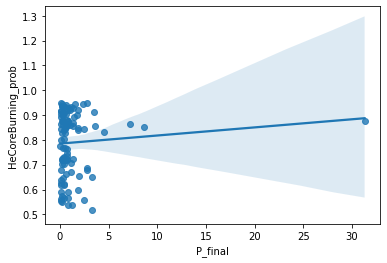

In [17]:
sns.regplot('P_final', 'HeCoreBurning_prob', data=d0[(d0['stability'] == 'CE') & (d0['HeCoreBurning_prob'] < 0.95)])

# sdB properties

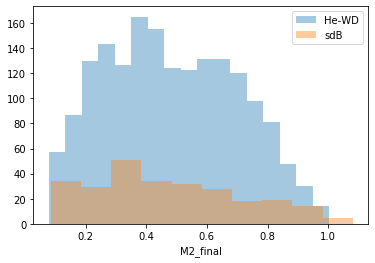

In [18]:
sns.distplot(d0[(d0['stability'] == 'CE') & (d0['product'] == 'He-WD')]['M2_final'], kde=False, label='He-WD')
sns.distplot(d0[(d0['stability'] == 'CE') & (d0['product'] == 'sdB')]['M2_final'], kde=False, label='sdB')
pl.legend()

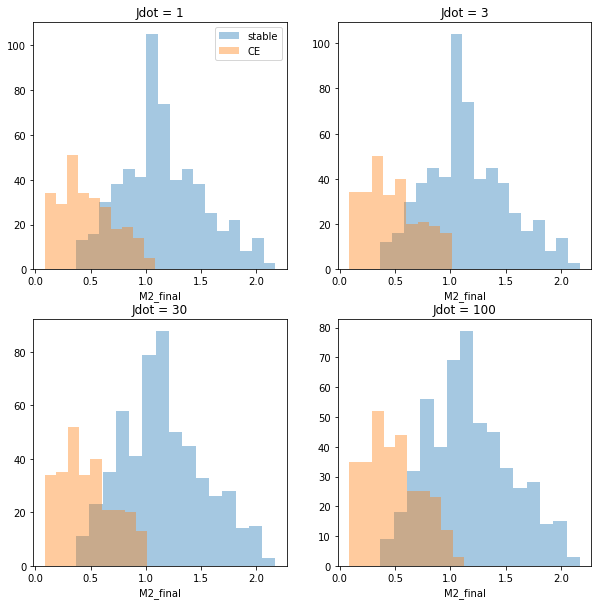

In [19]:
def plot_dist(df):
    sns.distplot(df[df['stability'] == 'stable']['M2_final'], kde=False, label='stable')
    sns.distplot(df[df['stability'] == 'CE']['M2_final'], kde=False, label='CE')

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.legend()
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

No handles with labels found to put in legend.


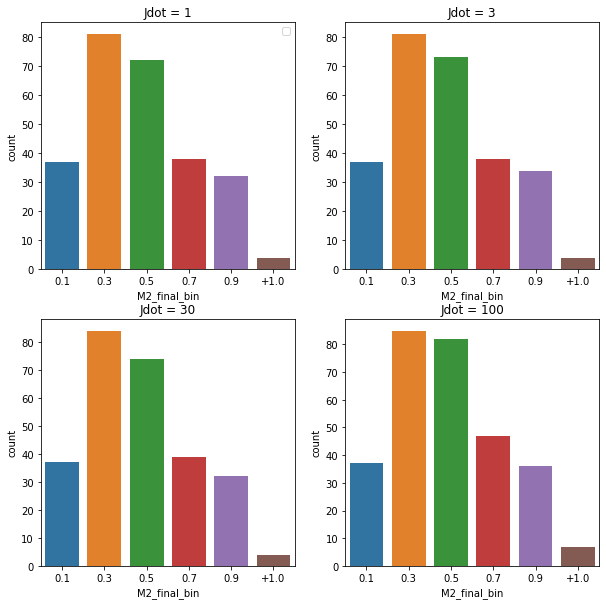

In [20]:
def plot_dist(df):
    sns.countplot('M2_final_bin', data=df[df['stability'] == 'CE'])

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.legend()
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

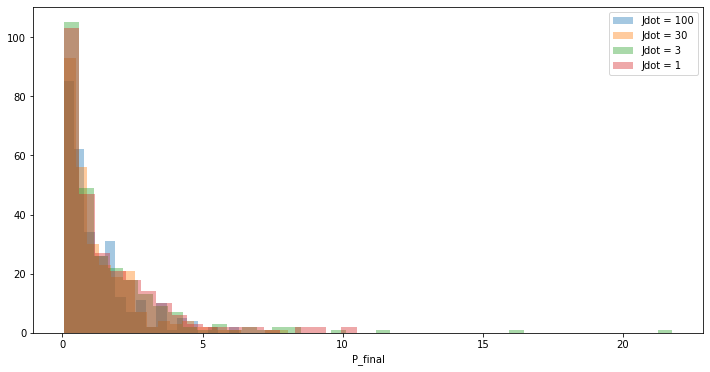

In [21]:
def plot_dist(df, **kwargs):
    sns.distplot(df[(df['stability'] == 'CE')]['P_final'], kde=False, **kwargs)

pl.figure(1, figsize=(12, 6))
plot_dist(dsdb3, label=label4)
plot_dist(dsdb2, label=label3)
plot_dist(dsdb1, label=label2)
plot_dist(dsdb0, label=label1)
pl.legend()


No handles with labels found to put in legend.


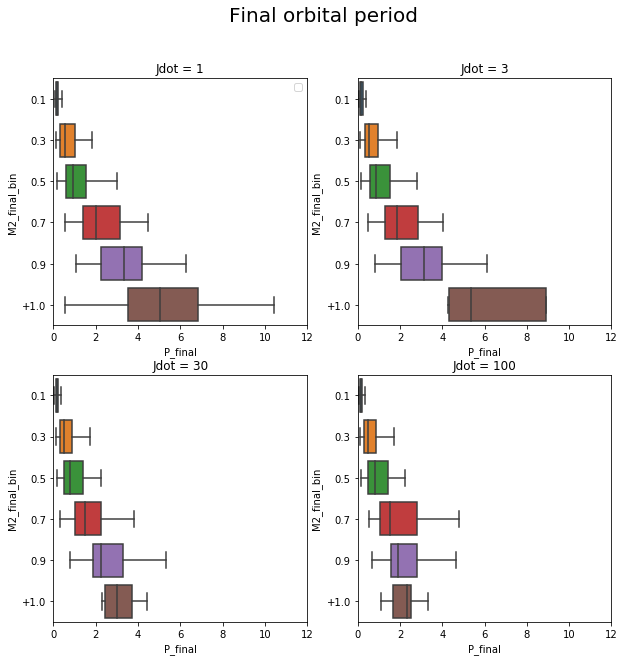

In [22]:
def plot_dist(df):
    sns.boxplot('P_final', 'M2_final_bin', data=df[df['stability'] == 'CE'], fliersize=0)
    pl.xlim([0, 12])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Final orbital period", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.legend()
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)


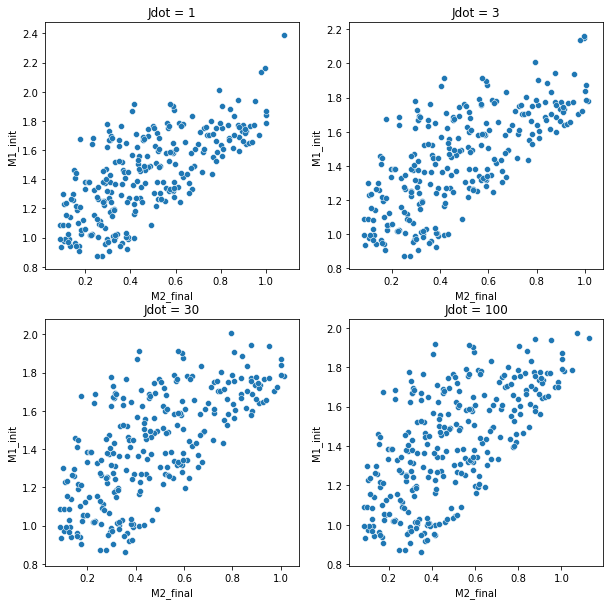

In [23]:
def plot_dist(df):
    sns.scatterplot('M2_final', 'M1_init', data=df[df['stability'] == 'CE'])

pl.figure(1, figsize=(10, 10))

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

# Relation between primary and companion during sdB phase

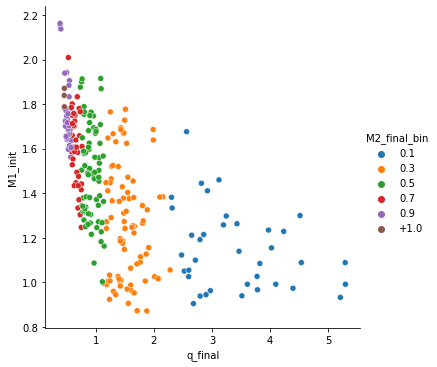

In [41]:
sns.relplot('q_final', 'M1_init', data=dsdb1[dsdb1['stability'] == 'CE'], hue='M2_final_bin')

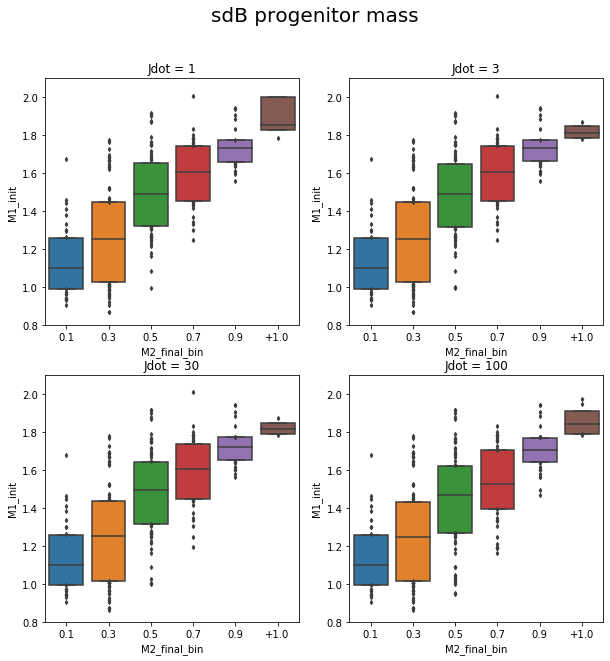

In [24]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'M1_init', data=df[df['stability'] == 'CE'], fliersize=3, whis=0)
    pl.ylim([0.8, 2.1])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("sdB progenitor mass", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

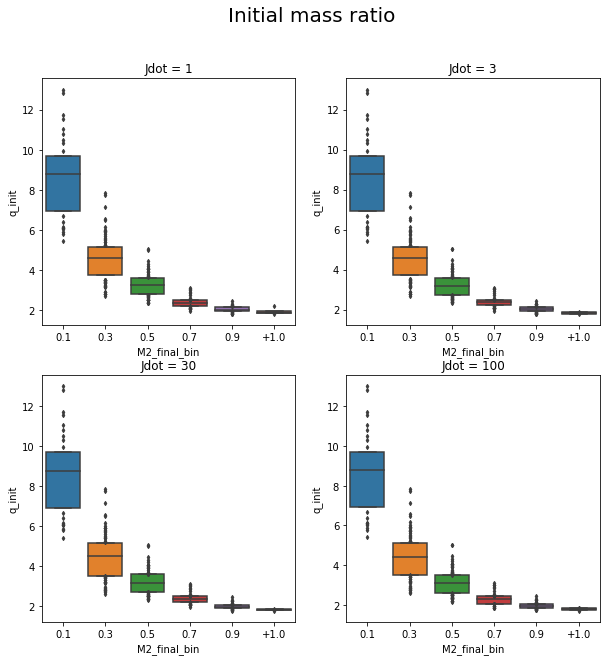

In [25]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'q_init', data=df[df['stability'] == 'CE'], fliersize=3, whis=0)

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Initial mass ratio", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

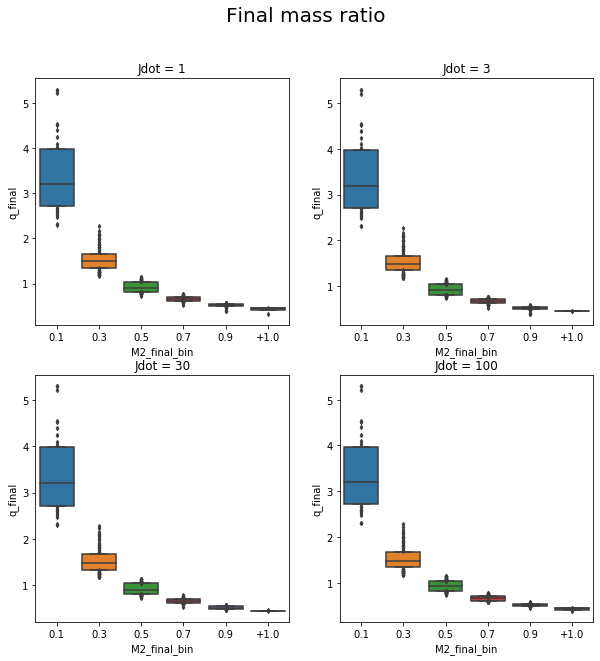

In [34]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'q_final', data=df[df['stability'] == 'CE'], fliersize=3, whis=0)

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Final mass ratio", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

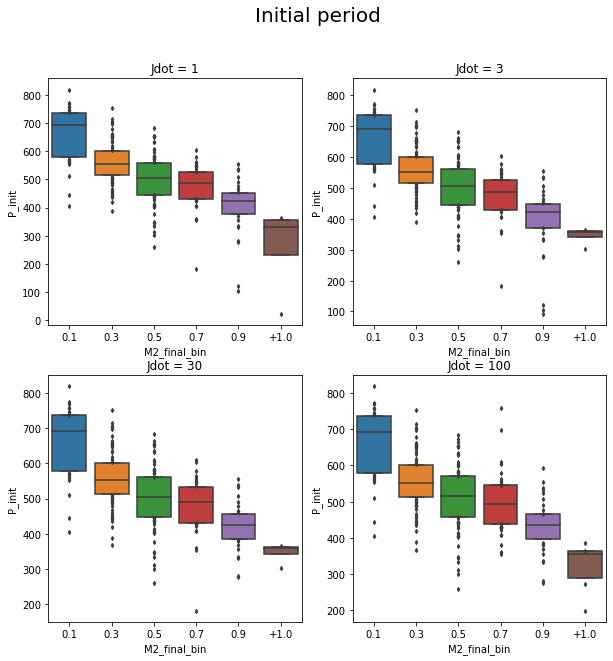

In [26]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'P_init', data=df[df['stability'] == 'CE'], fliersize=3, whis=0)

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Initial period", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

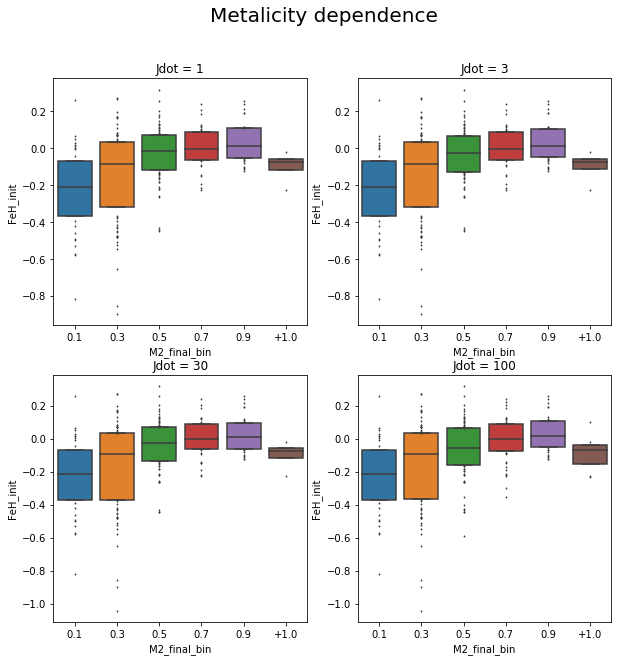

In [27]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'FeH_init', data=df[df['stability'] == 'CE'], fliersize=1, whis=0)

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Metalicity dependence", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

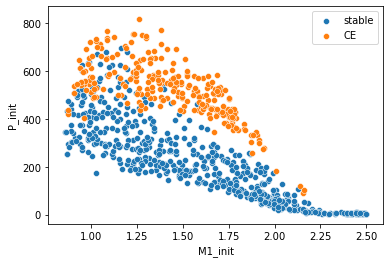

In [28]:
sns.scatterplot('M1_init', 'P_init', data=dsdb1[dsdb1['stability'] == 'stable'], label='stable')

sns.scatterplot('M1_init', 'P_init', data=dsdb1[dsdb1['stability'] == 'CE'], label='CE')



pl.legend()

Jdot = 1


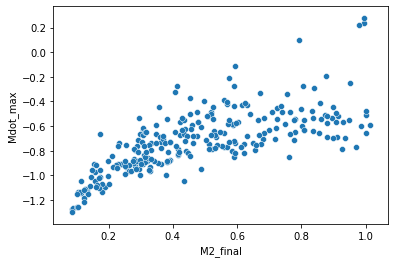

In [29]:
sns.scatterplot('M2_final', 'Mdot_max', data=dsdb1[dsdb1['stability'] == 'CE'])
print(label1)

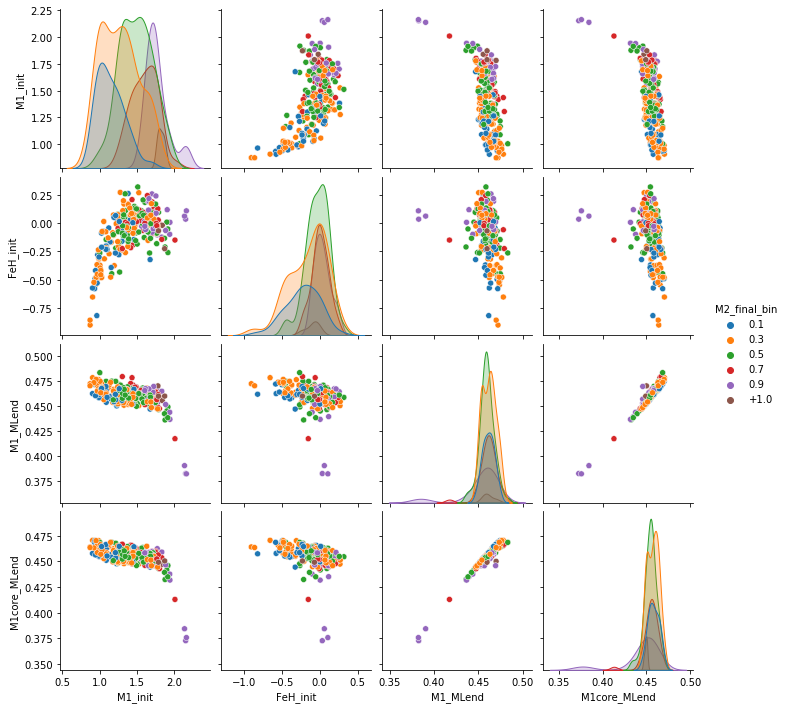

In [30]:
sns.pairplot(data=dsdb1[dsdb1['stability'] == 'CE'], vars=['M1_init','FeH_init','M1_MLend', 'M1core_MLend'], hue='M2_final_bin')

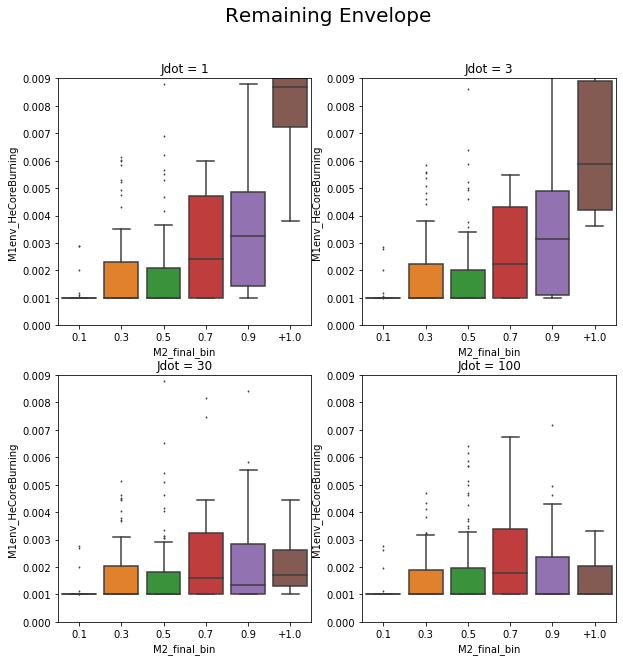

In [31]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'M1env_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1)
    pl.ylim([0, 0.009])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Remaining Envelope", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

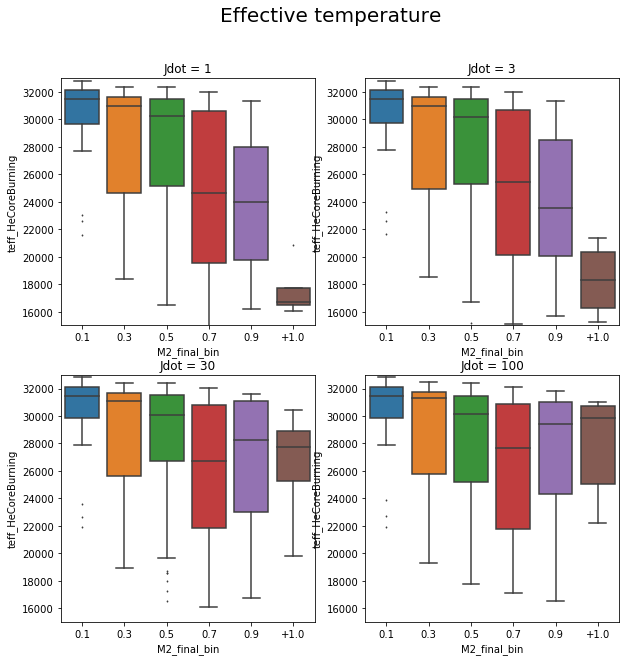

In [32]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'teff_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1)
    pl.ylim([15000, 33000])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Effective temperature", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)

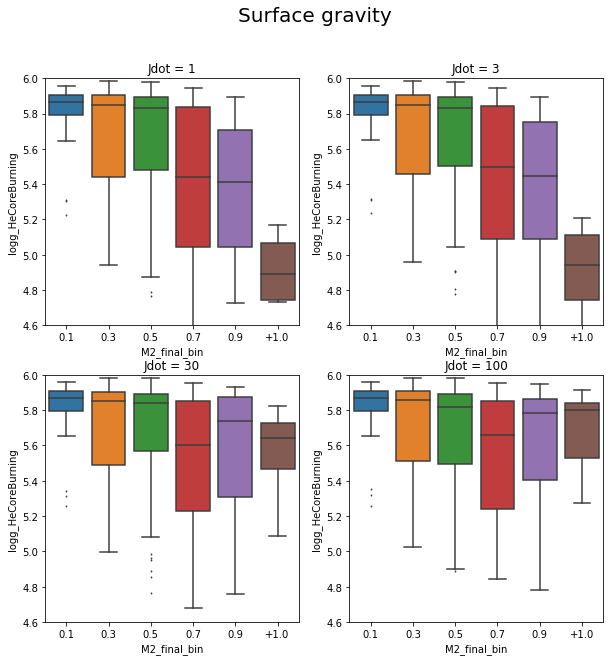

In [33]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'logg_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1)
    pl.ylim([4.6, 6.0])

fig = pl.figure(1, figsize=(10, 10))
fig.suptitle("Surface gravity", fontsize=20)

pl.subplot(221)
plot_dist(dsdb0)
pl.title(label1)

pl.subplot(222)
plot_dist(dsdb1)
pl.title(label2)

pl.subplot(223)
plot_dist(dsdb2)
pl.title(label3)

pl.subplot(224)
plot_dist(dsdb3)
_ = pl.title(label4)